# Technical Validation

This notebook contains code to reproduce all statistics and plots used for the "Validation section".

In [1]:
# Import modules
import geopandas as gpd
from shapely import wkt
import pandas as pd
import shapely
import os
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib
import matplotlib.pyplot as plt

# Create paths

def mkdir(dir):    
    if not os.path.exists(dir):
        os.mkdir(dir)
        
path_run = os.getcwd() + '/'
path_data_processed = path_run + 'data_processed/'
path_plots = path_run + 'plots/'
path_FLODIS_final = path_data_processed + 'FLODIS_final/'

In [10]:
# Number of events per country (geolocation finder)
print("Highest number of entries per country (IDMC)")
IDMC = pd.read_csv(path_FLODIS_final + 'FLODIS_displacements.csv')
print(IDMC['ISO3'].value_counts()[0:5],'\n')

print("Highest number of entries per country (EM-DAT)")
EMDAT = pd.read_csv(path_FLODIS_final + 'FLODIS_fatalities_damages.csv')
print(EMDAT['ISO3'].value_counts()[0:5],'\n')

Highest number of entries per country (IDMC)
IND    35
CHN    21
IDN    16
USA    14
ARG    13
Name: ISO3, dtype: int64 

Highest number of entries per country (EM-DAT)
IND    80
CHN    49
PHL    23
USA    23
PAK    22
Name: ISO3, dtype: int64 



In [3]:
IDMC = pd.read_csv(path_data_processed + 'IDMC_geolocation/IDMC_2008_2021_provinces_districts.csv')
IDMC = IDMC.loc[IDMC['Hazard Type']=='Flood']
prov_list = []
dist_list = []
dist_prov_list = []
nat_list = []
year_list = []

for year_temp in range(2013,2021+1):
    
    year_list.append(year_temp)
    IDMC_temp = IDMC[IDMC.Year == year_temp]    
    prov_list.append(len(IDMC_temp[~IDMC_temp.GID_1.isnull() & IDMC_temp.GID_2.isnull()]))
    dist_list.append(len(IDMC_temp[IDMC_temp.GID_1.isnull() & ~IDMC_temp.GID_2.isnull()]))
    dist_prov_list.append(len(IDMC_temp[~IDMC_temp.GID_1.isnull() & ~IDMC_temp.GID_2.isnull()]))
    nat_list.append(len(IDMC_temp[IDMC_temp.GID_1.isnull() & IDMC_temp.GID_2.isnull()]))

/home/mester/anaconda3/envs/ipykernel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  if sys.path[0] == '':


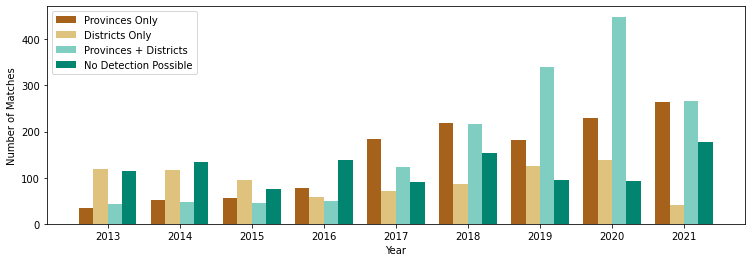

In [4]:
# Number of provinces/districts/no geolocation per year (IDMC)
fig, ax = plt.subplots(1,1,figsize=(12.5,4))
ax = plt.subplot(111)
ax.bar(np.array(year_list)-0.3,prov_list, width=0.2, color='#a6611a', align='center',label='Provinces Only')
ax.bar(np.array(year_list)-0.1,dist_list, width=0.2, color='#dfc27d', align='center',label='Districts Only')
ax.bar(np.array(year_list)+0.1,dist_prov_list, width=0.2, color='#80cdc1', align='center',label='Provinces + Districts')
ax.bar(np.array(year_list)+0.3,nat_list, width=0.2, color='#018571', align='center',label='No Detection Possible')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(np.arange(2013,2021+1, 1.0))
plt.savefig(path_plots + 'provinces_districts_stat_ext.png',dpi = 300, box_inches='tight')

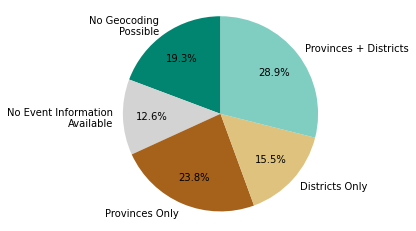

In [5]:
# Pie chart: distribution of detected provinces and/or districts, and no geolocation found (IDMC)
IDMC_temp = IDMC[~IDMC.event_name.isnull()]
labels = ['No Geocoding\nPossible','No Event Information\nAvailable','Provinces Only', 'Districts Only', 'Provinces + Districts']
sizes = []
sizes.append(len(IDMC_temp[IDMC_temp.GID_1.isnull() & IDMC_temp.GID_2.isnull()]))
sizes.append(len(IDMC[IDMC.event_name.isnull()]))
sizes.append(len(IDMC_temp[~IDMC_temp.GID_1.isnull() & IDMC_temp.GID_2.isnull()]))
sizes.append(len(IDMC_temp[IDMC_temp.GID_1.isnull() & ~IDMC_temp.GID_2.isnull()]))
sizes.append(len(IDMC_temp[~IDMC_temp.GID_1.isnull() & ~IDMC_temp.GID_2.isnull()]))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#018571','lightgrey','#a6611a','#dfc27d','#80cdc1'],
        startangle=90,pctdistance=0.7) #shadow=True, 
ax1.axis('equal')  
plt.savefig(path_plots + 'IDMC_stat.png',dpi = 300,)

/home/mester/anaconda3/envs/ipykernel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6


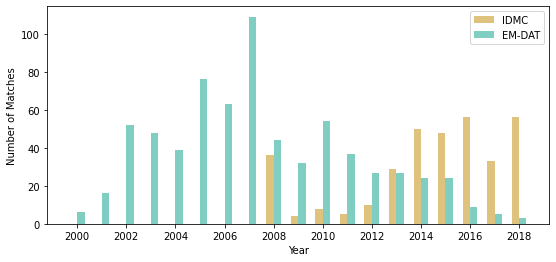

In [6]:
# Number of matched IDMC/EM-DAT events over time
IDMC = pd.read_csv(path_FLODIS_final + 'FLODIS_displacements.csv')
EMDAT = pd.read_csv(path_FLODIS_final + 'FLODIS_fatalities_damages.csv')
IDMC_found_list = []
EMDAT_found_list = []
year_list = []

for year_temp in range(2000,2018+1): 
    year_list.append(year_temp)
    EMDAT_temp = EMDAT[EMDAT.year == year_temp]
    EMDAT_found_list.append(len(EMDAT_temp))
    IDMC_temp = IDMC[IDMC.year == year_temp]
    IDMC_found_list.append(len(IDMC_temp))

fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.bar(np.array(year_list)-0.15,IDMC_found_list, width=0.3, color='#dfc27d', align='center',label='IDMC')
ax.bar(np.array(year_list)+0.15,EMDAT_found_list, width=0.3, color='#80cdc1', align='center',label='EM-DAT')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(np.arange(2000,2020,2))
plt.savefig(path_plots + 'EMDAT_IDMC_stat.png',dpi = 300, box_inches='tight')

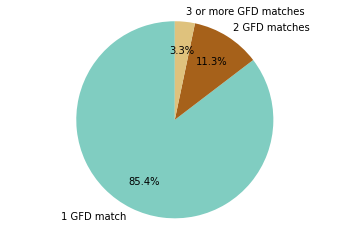

In [7]:
# Pie chart: share of DFO matches per IDMC matches
#IDMC_temp = IDMC[~IDMC.event_name.isnull()]
labels = '1 GFD match', '2 GFD matches', '3 or more GFD matches'
sizes = []
sizes.append(len(IDMC[IDMC.DFO_matches == 1]))
sizes.append(len(IDMC[IDMC.DFO_matches == 2]))
sizes.append(len(IDMC[IDMC.DFO_matches >= 3]))
   
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#80cdc1','#a6611a','#dfc27d'],
        startangle=90,pctdistance=0.7) #shadow=True, 
ax1.axis('equal')  
plt.savefig(path_plots + 'IDMC_GFD_matches.png',dpi = 300,)

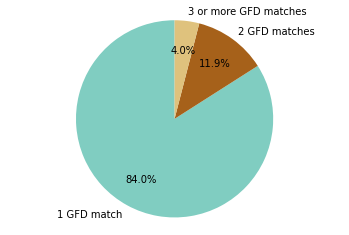

In [8]:
# Pie chart: share of DFO matches per EM-DAT matches
labels = '1 GFD match', '2 GFD matches', '3 or more GFD matches'
sizes = []
sizes.append(len(EMDAT[EMDAT.DFO_matches == 1]))
sizes.append(len(EMDAT[EMDAT.DFO_matches == 2]))
sizes.append(len(EMDAT[EMDAT.DFO_matches >= 3]))
    
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#80cdc1','#a6611a','#dfc27d'],
        startangle=90,pctdistance=0.7) 
ax1.axis('equal') 
plt.savefig(path_plots + 'EMDAT_GFD_matches.png',dpi = 300,)